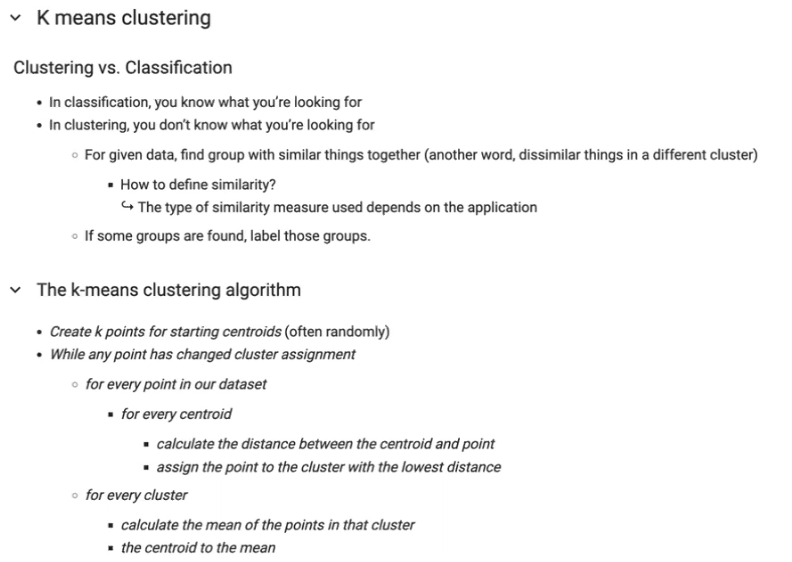

In [ ]:
# kMeans 모델은 cluster 나누는 Classification 모델

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# sklearn에서 제공하는 iris 꽃 데이터셋 로드
iris = load_iris()
# print(iris.DESCR)
irisData = pd.DataFrame(iris.data)
irisData.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
irisData.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


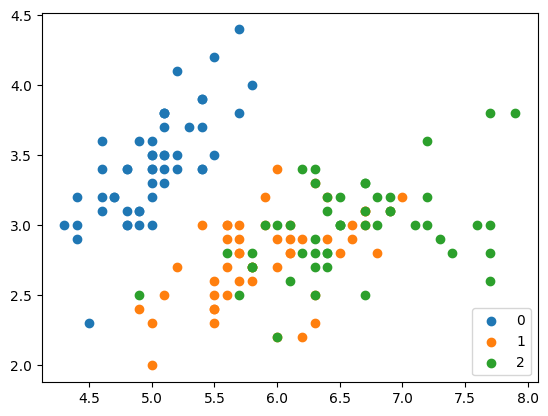

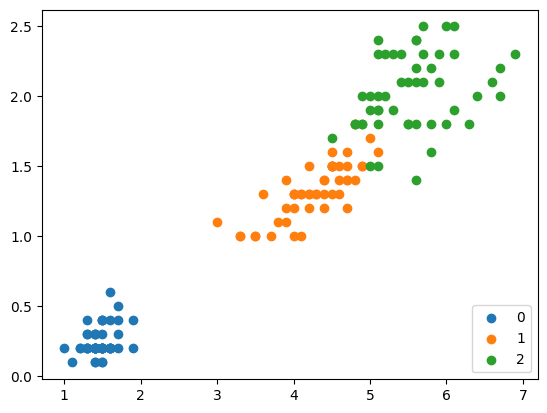

In [ ]:
import matplotlib.pyplot as plt

irisGroup = irisData # feature로 사용할 데이터
irisGroup['Species'] = iris.target # target 값을 'Species' columns 추가 및 데이터 저장

fig, ax = plt.subplots()
# 'Species'에 따라 그룹을 분리, Sepal 관련 데이터 표시
for name, group in irisGroup.groupby('Species'):
  ax.scatter(group.SepalLength, group.SepalWidth, marker='o', label=name)
ax.legend(fontsize=10, loc='lower right')

fig, ax = plt.subplots()
# 'Species'에 따라 그룹을 분리, Petal 관련 데이터 표시
for name, group in irisGroup.groupby('Species'):
  ax.scatter(group.PetalLength, group.PetalWidth, marker='o', label=name)
ax.legend(fontsize=10, loc='lower right')

# 결과를 보니 Petal로 분류하는 것이 더 잘 나뉘어짐

In [ ]:
from sklearn.cluster import KMeans

X = irisData
Y = iris.target

# KMeans 모델 사용
kMeansModel = KMeans(n_clusters=3, n_init=10) # n_init 만큼 초기 조건을 바꿔가며 실행
kMeansModel.fit(X)

# print(kMeansModel.lables_)

pd.crosstab(kMeansModel.labels_, Y)

col_0,0,1,2
row_0,,,
0,0,50,1
1,50,0,0
2,0,0,49


In [ ]:
# Sepal 데이터로 학습시켜 결과 보기
kMeansModel.fit(irisData[['SepalLength', 'SepalWidth']])

pd.crosstab(kMeansModel.labels_, Y)

col_0,0,1,2
row_0,,,
0,0,38,15
1,50,0,0
2,0,12,35


In [ ]:
# Petal 데이터로 학습시켜 결과 보기
kMeansModel.fit(irisData[['PetalLength', 'PetalWidth']])

pd.crosstab(kMeansModel.labels_, Y)

col_0,0,1,2
row_0,,,
0,0,48,4
1,50,0,0
2,0,2,46
